## Importing Libraries

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading Model

In [12]:
model=tf.keras.models.load_model('trained.keras')

In [13]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

## Visualizing Test Image

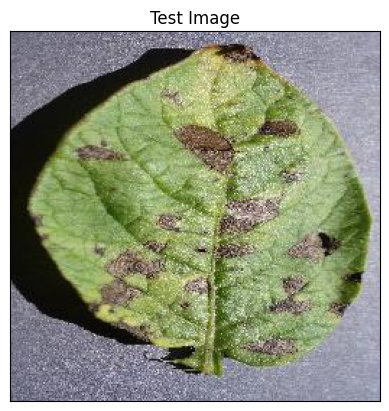

In [14]:
import cv2 
image_path="test/test/PotatoEarlyBlight2.JPG"
#Reading Image
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [15]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr]) #convert single image to batch as our model is trained by using 32 batch
input_arr,input_arr.shape

(array([[[[101., 100., 116.],
          [111., 110., 126.],
          [100.,  99., 115.],
          ...,
          [165., 164., 182.],
          [167., 166., 184.],
          [162., 161., 179.]],
 
         [[105., 104., 120.],
          [118., 117., 133.],
          [116., 115., 131.],
          ...,
          [162., 161., 179.],
          [151., 150., 168.],
          [157., 156., 174.]],
 
         [[128., 127., 143.],
          [102., 101., 117.],
          [102., 101., 117.],
          ...,
          [169., 168., 186.],
          [158., 157., 175.],
          [163., 162., 180.]],
 
         ...,
 
         [[ 87.,  88., 108.],
          [142., 143., 163.],
          [123., 124., 144.],
          ...,
          [143., 146., 165.],
          [150., 153., 172.],
          [150., 153., 172.]],
 
         [[ 79.,  80., 100.],
          [119., 120., 140.],
          [ 98.,  99., 119.],
          ...,
          [156., 159., 178.],
          [145., 148., 167.],
          [138., 141., 160.

In [16]:
prediction=model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 119ms/step


(array([[1.5718651e-15, 1.3462905e-20, 1.5104567e-20, 6.1665694e-20,
         2.3753682e-26, 4.6516644e-20, 4.4069052e-24, 4.2152151e-17,
         2.9905208e-15, 3.4375829e-21, 5.8147203e-27, 2.6907827e-26,
         2.0234561e-23, 7.9384418e-21, 9.0274446e-27, 6.9258974e-24,
         8.5109697e-18, 2.8964194e-25, 2.9406281e-18, 7.7984827e-21,
         1.0000000e+00, 2.4293108e-15, 1.7065801e-17, 5.1037544e-26,
         8.7728117e-23, 1.9445486e-18, 3.0675044e-16, 9.0289435e-23,
         6.4685913e-23, 1.2403257e-15, 5.8213923e-15, 1.6079937e-22,
         3.6753980e-17, 7.8821793e-25, 5.1153815e-22, 2.6493762e-28,
         2.8623106e-28, 2.6755977e-15]], dtype=float32),
 (1, 38))

In [17]:
result_index=np.argmax(prediction)
result_index

20

In [18]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

## Displaying Disease

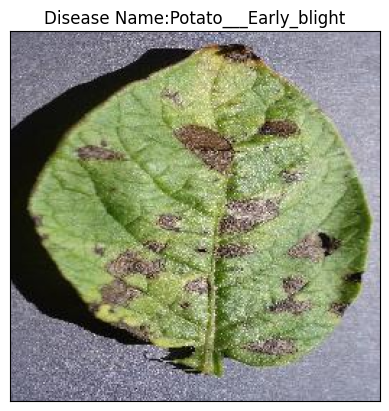

In [19]:
model_prediction=class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name:{model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()